#### 2.Feature Importance:
check if the feature is important or not, if it isn't important then should be deleted.
#### Random Forest:
decision tree makes 1 tree but random forest makes more than one tree.

In [23]:
import pandas as pd
data= pd.read_csv("titanic.csv")
# print(data)


#### loading data
some datas are empty, for not distributed training, should be replaced.

In [24]:
y=data["Survived"]

data["Age"]=data["Age"].fillna("0")
data["Fare"]=data["Fare"].fillna("0")
data["Embarked"]=data["Embarked"].fillna("C")
data["SibSp"]=data["SibSp"].fillna("0")

data["Sex"]=data["Sex"].map({"male":1,"female":2})
data["Embarked"]=data["Embarked"].map({"C":1,"S":2,"Q":3})

x=data[["Pclass","Sex","Age","SibSp","Fare","Embarked"]]
print(x)

     Pclass  Sex   Age  SibSp     Fare  Embarked
0         3    1  22.0      1   7.2500         2
1         1    2  38.0      1  71.2833         1
2         3    2  26.0      0   7.9250         2
3         1    2  35.0      1  53.1000         2
4         3    1  35.0      0   8.0500         2
..      ...  ...   ...    ...      ...       ...
886       2    1  27.0      0  13.0000         2
887       1    2  19.0      0  30.0000         2
888       3    2     0      1  23.4500         2
889       1    1  26.0      0  30.0000         1
890       3    1  32.0      0   7.7500         3

[891 rows x 6 columns]


#### Splitting train and test then, fitting model.

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
p=model.predict(x_test)

#### Check the accuracy:

In [26]:
from sklearn.metrics import accuracy_score
print("accuracy of random forest is:",accuracy_score(p,y_test))

accuracy of random forest is: 0.8547486033519553


In [27]:
# print(model.predict([[1,1,20,0,400,1]]))

#### feature importance
with see the results on diagram, important features, would show themselves.

In [28]:
import seaborn as sb
import matplotlib.pylab as plt

# print(model.feature_importances_)
data=pd.Series(model.feature_importances_,index=["Pclass","Sex","Age","SibSp","Fare","Embarked"])
#pandas series makes a set of 2 columns of data
print(data)

Pclass      0.094466
Sex         0.231314
Age         0.277025
SibSp       0.053066
Fare        0.304763
Embarked    0.039367
dtype: float64


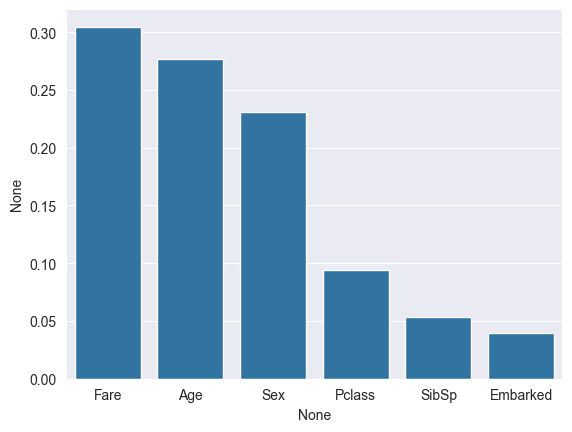

In [29]:
data=data.sort_values(ascending=False)
# sb.barplot(x=data,y=data.index)
sb.barplot(y=data,x=data.index)
plt.show()